In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm
tqdm.pandas()

from pathlib import Path
from utils import *
from plots import *

In [2]:
data_path = "data"

In [3]:
DataDownloader().download_all_csv()

In [3]:
covidpro_df = pd.read_csv(Path(data_path, CSVName.COVIDPRO_CSV))
dpc_regioni_df = pd.read_csv(Path(data_path, CSVName.DPC_REGIONI))
dpc_province_df = pd.read_csv(Path(data_path, CSVName.DPC_PROVINCE))

In [4]:
# Check if these replacements are needed
dpc_province_df.denominazione_provincia = dpc_province_df.denominazione_provincia.str.replace("Forlì-Cesena", "Forli-Cesena")
dpc_regioni_df.denominazione_regione = dpc_regioni_df.denominazione_regione.str.replace("P.A. Trento", "Trentino Alto Adige").replace("P.A. Bolzano", "Trentino Alto Adige")
covidpro_df.Region = covidpro_df.Region.str.replace("P.A. Trento", "Trentino Alto Adige").replace("P.A. Bolzano", "Trentino Alto Adige")

In [5]:
covidpro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25571 entries, 0 to 25570
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_prov         25571 non-null  int64 
 1   Province        25571 non-null  object
 2   Date            25571 non-null  object
 3   Deaths          25571 non-null  int64 
 4   Tot_deaths      25571 non-null  int64 
 5   New_cases       25571 non-null  int64 
 6   Curr_pos_cases  25571 non-null  int64 
 7   Region          25571 non-null  object
 8   id_reg          25571 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.8+ MB


In [6]:
covidpro_df.head()

,id_prov,Province,Date,Deaths,Tot_deaths,New_cases,Curr_pos_cases,Region,id_reg
0,84,Agrigento,2020-02-24,0,0,0,0,Sicilia,19
1,6,Alessandria,2020-02-24,0,0,0,0,Piemonte,1
2,42,Ancona,2020-02-24,0,0,0,0,Marche,11
3,7,Aosta,2020-02-24,0,0,0,0,Valle d'Aosta,2
4,51,Arezzo,2020-02-24,0,0,0,0,Toscana,9


In [7]:
covidpro_df.tail()

,id_prov,Province,Date,Deaths,Tot_deaths,New_cases,Curr_pos_cases,Region,id_reg
25566,2,Vercelli,2020-11-30,0,308,30,6370,Piemonte,1
25567,23,Verona,2020-11-30,0,579,266,27264,Veneto,5
25568,102,Vibo Valentia,2020-11-30,0,18,0,945,Calabria,18
25569,24,Vicenza,2020-11-30,0,485,266,25962,Veneto,5
25570,56,Viterbo,2020-11-30,0,141,73,6967,Lazio,12


In [8]:
dpc_regioni_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   data                          5901 non-null   object 
 1   stato                         5901 non-null   object 
 2   codice_regione                5901 non-null   int64  
 3   denominazione_regione         5901 non-null   object 
 4   lat                           5901 non-null   float64
 5   long                          5901 non-null   float64
 6   ricoverati_con_sintomi        5901 non-null   int64  
 7   terapia_intensiva             5901 non-null   int64  
 8   totale_ospedalizzati          5901 non-null   int64  
 9   isolamento_domiciliare        5901 non-null   int64  
 10  totale_positivi               5901 non-null   int64  
 11  variazione_totale_positivi    5901 non-null   int64  
 12  nuovi_positivi                5901 non-null   int64  
 13  dim

In [9]:
dpc_regioni_df.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,0,0,0,0,NaN,NaN,0,5,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,0,0,0,0,NaN,NaN,0,0,NaN,NaN
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,0,0,0,0,NaN,NaN,0,1,NaN,NaN
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,0,0,0,0,NaN,NaN,0,10,NaN,NaN
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,0,18,0,0,NaN,NaN,18,148,NaN,NaN


In [10]:
dpc_regioni_df.tail()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
5896,2020-11-30T17:00:00,ITA,19,Sicilia,38.115697,13.362357,1547,226,1773,38851,...,140,1138,21507,1555,38536.0,25150.0,63686,959923,654885.0,NaN
5897,2020-11-30T17:00:00,ITA,9,Toscana,43.769231,11.255889,1584,278,1862,40164,...,-1518,893,58774,2641,78969.0,24472.0,103441,1568208,958389.0,effettuati 84798 tamponi rapidi antigenici di...
5898,2020-11-30T17:00:00,ITA,10,Umbria,43.106758,12.388247,366,65,431,7804,...,-208,68,15166,407,6620.0,17188.0,23808,416530,224790.0,"Si fa presente come dei 13 decessi odierni, 6 ..."
5899,2020-11-30T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,124,11,135,1182,...,-133,47,4878,315,5798.0,712.0,6510,60435,33903.0,NaN
5900,2020-11-30T17:00:00,ITA,5,Veneto,45.434905,12.338452,2460,320,2780,77885,...,954,2003,61216,3711,36847.0,108745.0,145592,2791439,1062810.0,Tamponi antigenici 960785 numero di soggetti c...


In [11]:
dpc_regioni_df.tail().T

,5896,5897,5898,5899,5900
data,2020-11-30T17:00:00,2020-11-30T17:00:00,2020-11-30T17:00:00,2020-11-30T17:00:00,2020-11-30T17:00:00
stato,ITA,ITA,ITA,ITA,ITA
codice_regione,19,9,10,2,5
denominazione_regione,Sicilia,Toscana,Umbria,Valle d'Aosta,Veneto
lat,38.1157,43.7692,43.1068,45.7375,45.4349
long,13.3624,11.2559,12.3882,7.32015,12.3385
ricoverati_con_sintomi,1547,1584,366,124,2460
terapia_intensiva,226,278,65,11,320
totale_ospedalizzati,1773,1862,431,135,2780
isolamento_domiciliare,38851,40164,7804,1182,77885


In [12]:
dpc_province_df.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
0,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,NaN
1,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,NaN
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,NaN
3,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,NaN
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,NaN,NaN,0,NaN


In [13]:
dpc_province_df.tail()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
39302,2020-11-30T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,21253,NaN
39303,2020-11-30T17:00:00,ITA,5,Veneto,28,Padova,PD,45.406930,11.876087,27671,NaN
39304,2020-11-30T17:00:00,ITA,5,Veneto,29,Rovigo,RO,45.071073,11.790070,3890,NaN
39305,2020-11-30T17:00:00,ITA,5,Veneto,899,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,2461,NaN
39306,2020-11-30T17:00:00,ITA,5,Veneto,999,In fase di definizione/aggiornamento,NaN,NaN,NaN,358,NaN


In [14]:
dpc_province_df['data'] = pd.to_datetime(dpc_province_df['data'])
dpc_regioni_df['data'] = pd.to_datetime(dpc_regioni_df['data'])
covidpro_df['Date'] = pd.to_datetime(covidpro_df['Date'])

In [15]:
# Ratio of positives over tampons
dpc_regioni_df['NC_R'] = dpc_regioni_df['nuovi_positivi']/dpc_regioni_df['tamponi']

# Ratio of new positives over total positives
dpc_regioni_df['NP_R'] = dpc_regioni_df['nuovi_positivi']/dpc_regioni_df['totale_positivi']

# Ratio of Itensive care over total cases
dpc_regioni_df['IC_R'] = dpc_regioni_df['terapia_intensiva']/dpc_regioni_df['totale_positivi']

# Ratio of hospitalized over total cases
dpc_regioni_df['Hosp_R'] = dpc_regioni_df['totale_ospedalizzati']/dpc_regioni_df['totale_positivi']

# Ratio of dead people over total cases
dpc_regioni_df['DR'] = dpc_regioni_df['deceduti']/dpc_regioni_df['totale_positivi']

In [16]:
covidpro_df['New_cases'] = covidpro_df['New_cases'].apply(lambda x: 0 if x is np.NaN or x < 0 else x)
covidpro_df['Deaths'] = covidpro_df['Deaths'].apply(lambda x: 0 if x is np.NaN or x < 0 else x)

In [17]:
def compute_ratio(x):
    if x['Curr_pos_cases'] == 0:
        return 0
    else:
        return x['New_cases']/x['Curr_pos_cases']

In [18]:
# Ratio of positives over total cases
covidpro_df['NP_R'] = covidpro_df.progress_apply(compute_ratio, axis=1)

100%|██████████| 25571/25571 [00:00<00:00, 50664.62it/s]


In [19]:
def compute_ratio(x):
    if x['Curr_pos_cases'] == 0:
        return 0
    else:
        return x['Deaths']/x['Curr_pos_cases']

In [20]:
# Ratio of dead people over total cases
covidpro_df['DR'] = covidpro_df.progress_apply(compute_ratio, axis=1)

100%|██████████| 25571/25571 [00:00<00:00, 42466.18it/s]


In [21]:
dpc_regioni_df['NC_R_Rolling'] = dpc_regioni_df['NC_R'].rolling(window=7).mean()
dpc_regioni_df['IC_R_Rolling'] = dpc_regioni_df['IC_R'].rolling(window=7).mean()
dpc_regioni_df['totale_positivi_Rolling'] = dpc_regioni_df['totale_positivi'].rolling(window=7).mean()

covidpro_df['NP_R_Rolling'] = covidpro_df['NP_R'].rolling(window=7).mean()
covidpro_df['DR_Rolling'] = covidpro_df['DR'].rolling(window=7).mean()

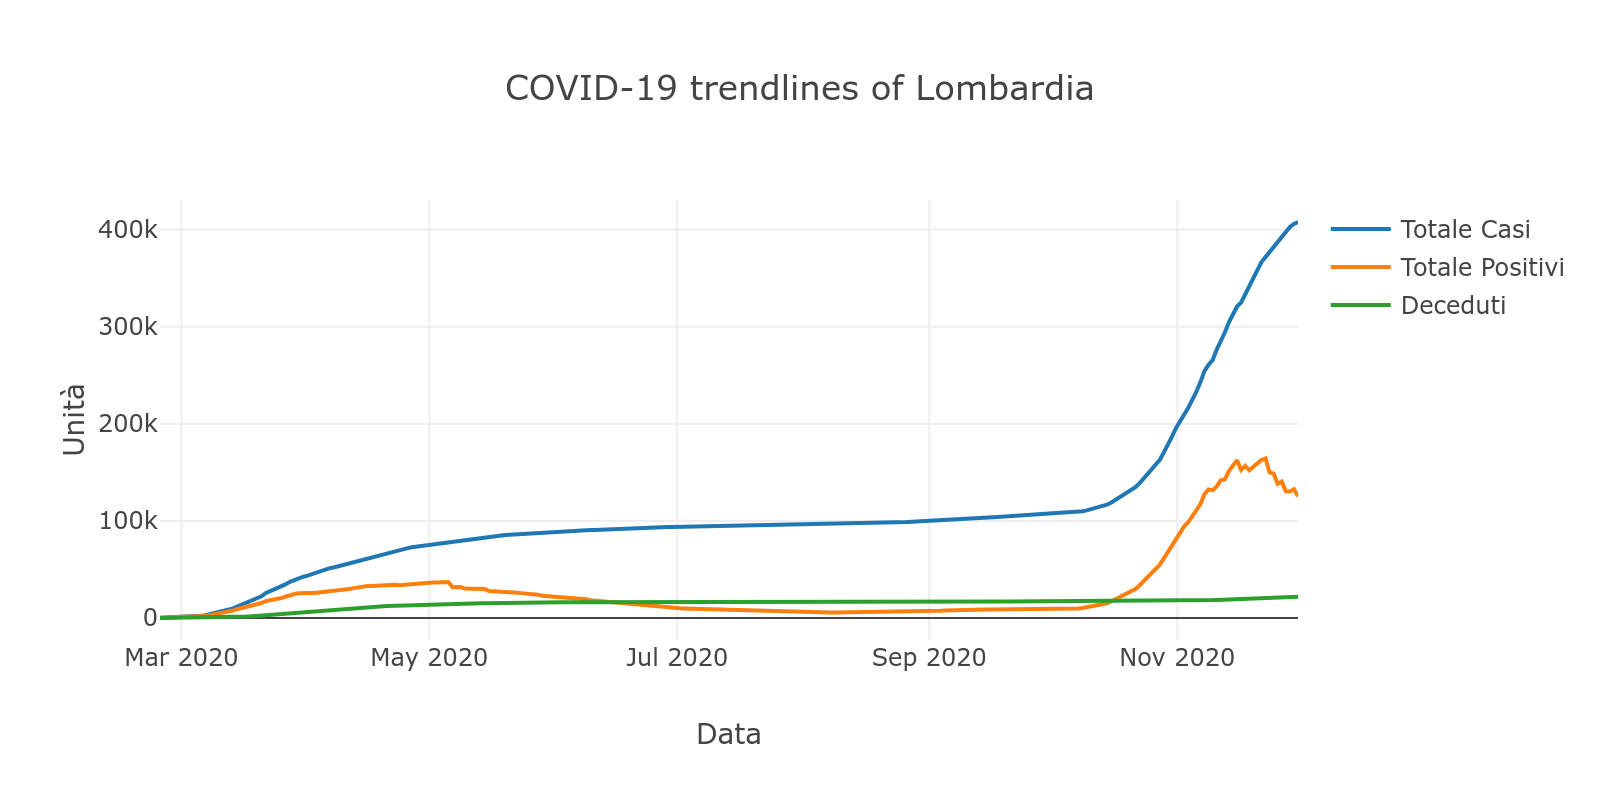

In [22]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['totale_casi', 'totale_positivi', 'deceduti'],
                    legend_titles=['Totale Casi', 'Totale Positivi', 'Deceduti'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True)

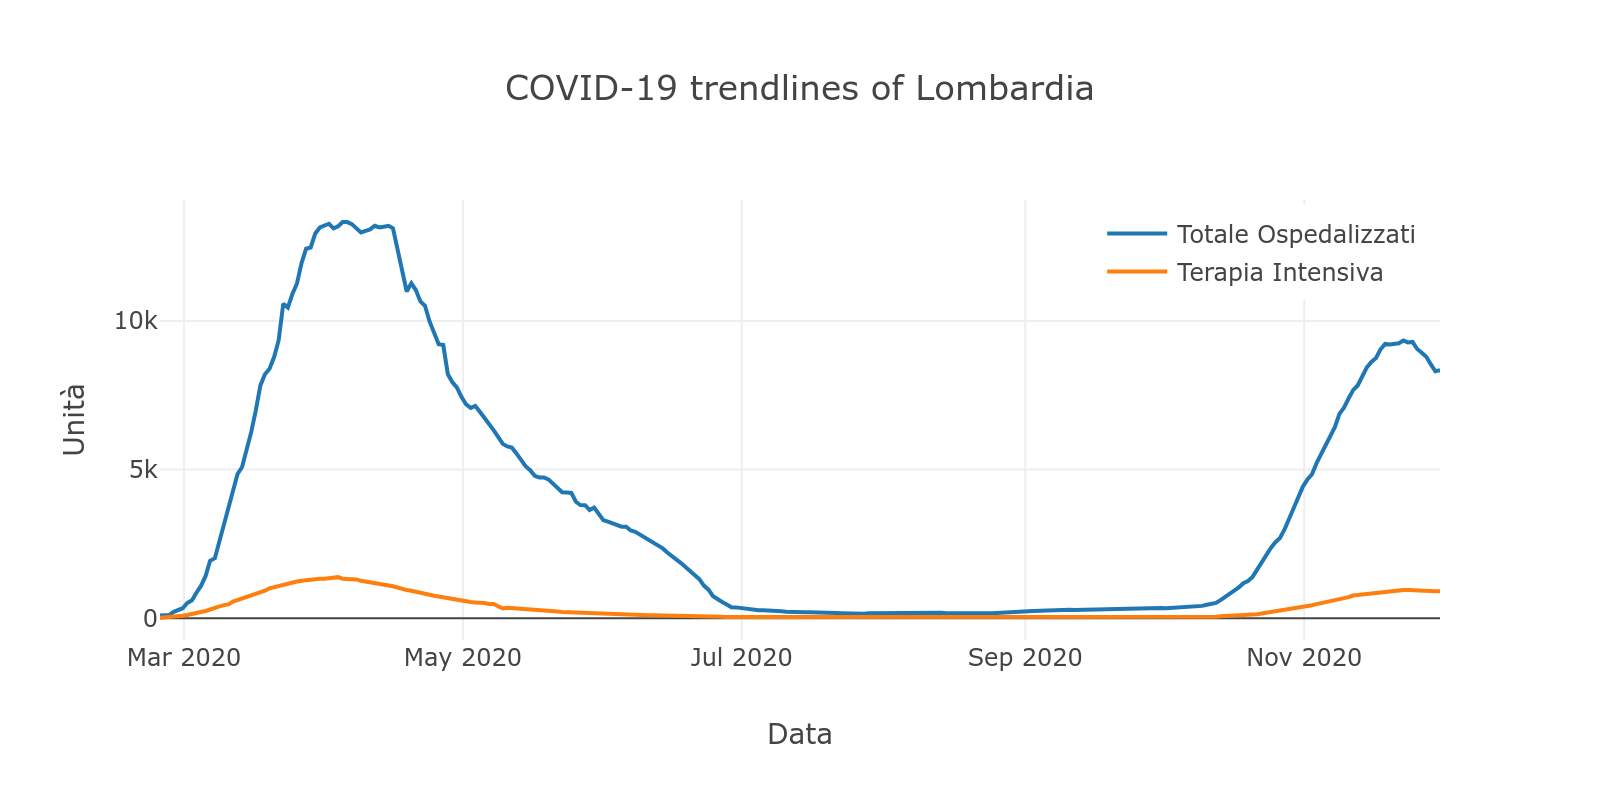

In [23]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['totale_ospedalizzati', 'terapia_intensiva'],
                    legend_titles=['Totale Ospedalizzati', 'Terapia Intensiva'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True,
                    blend_legend=True)

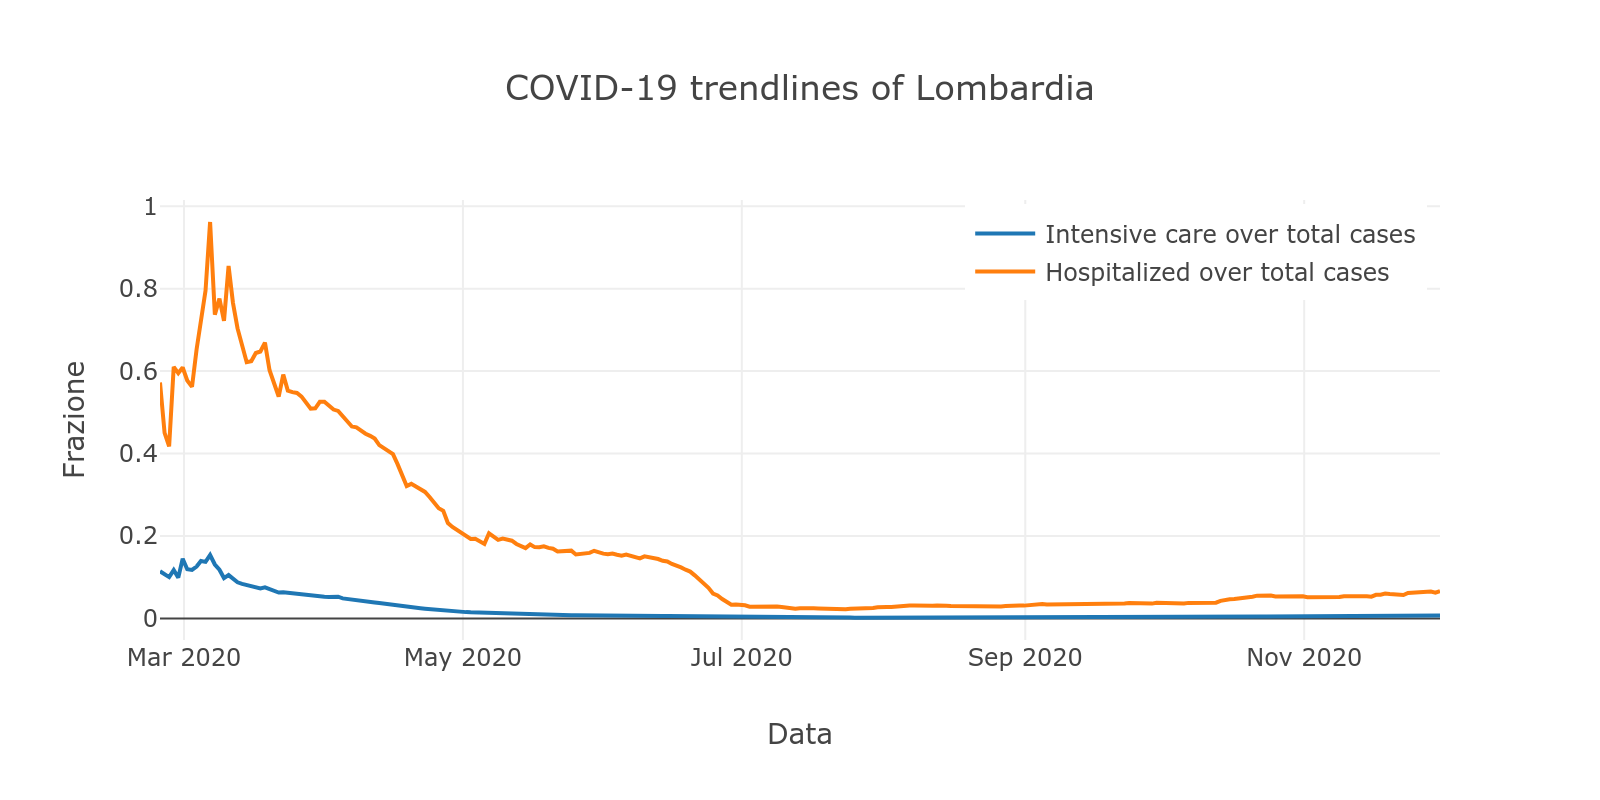

In [24]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['IC_R', 'Hosp_R'],
                    legend_titles=['Intensive care over total cases', 'Hospitalized over total cases'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Frazione',
                    output_image=True,
                    blend_legend=True)

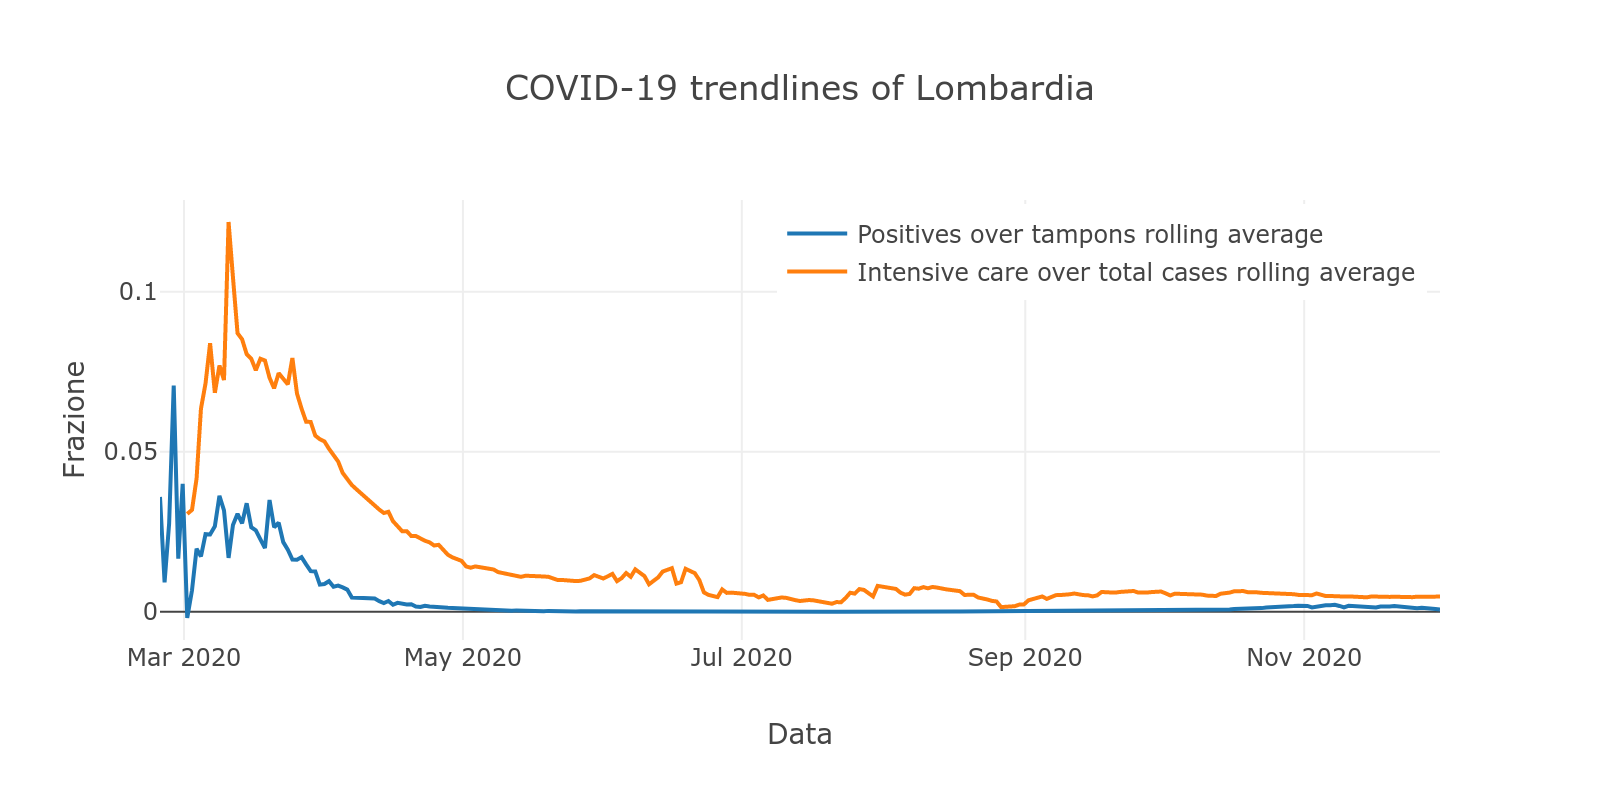

In [25]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['NC_R_Rolling', 'IC_R_Rolling'],
                    legend_titles=['Positives over tampons rolling average', 'Intensive care over total cases rolling average'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Frazione',
                    output_image=True,
                    blend_legend=True)

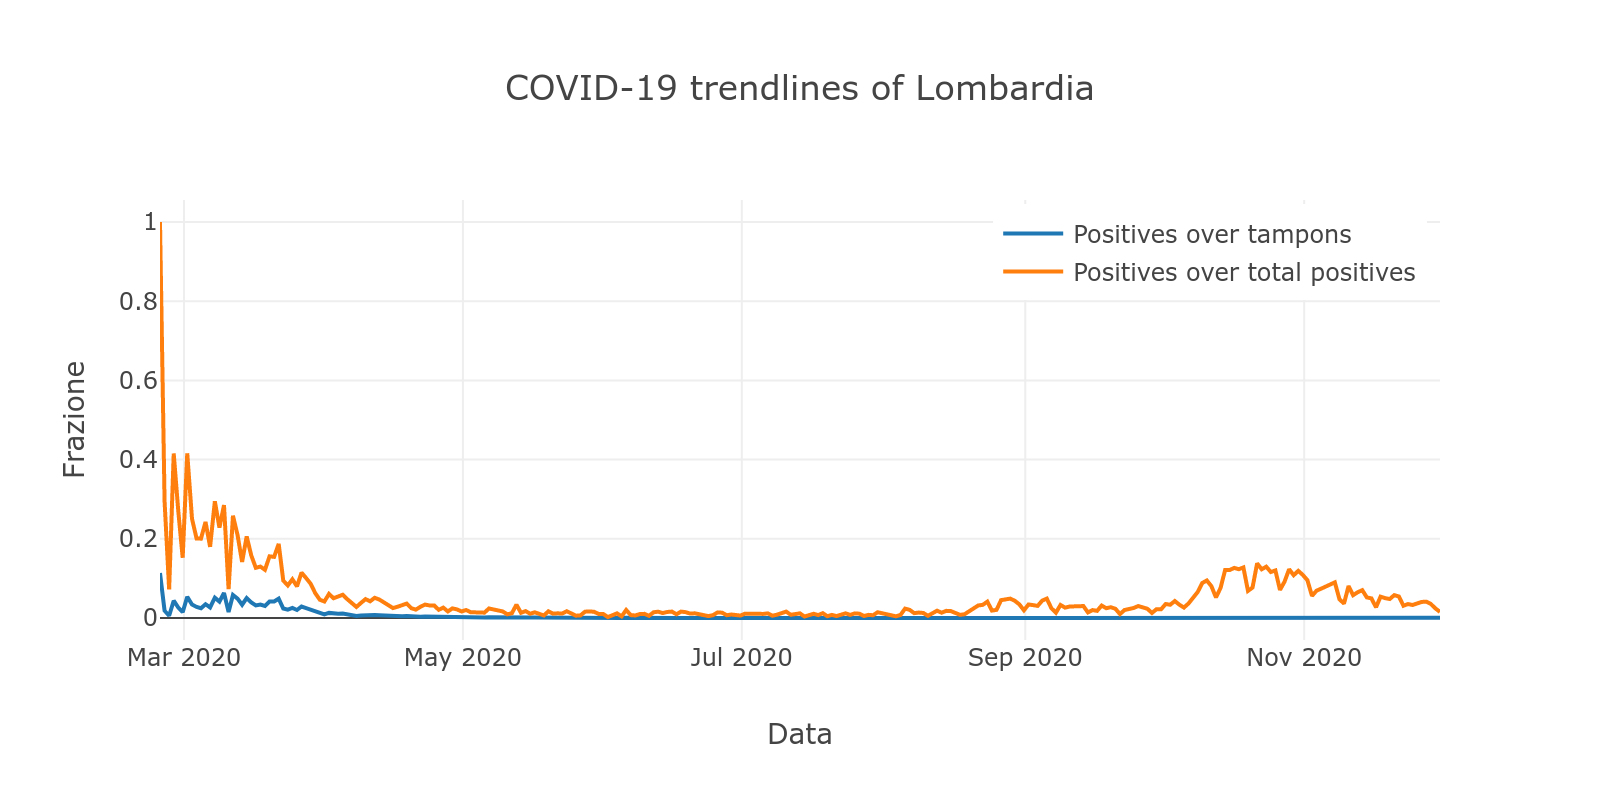

In [26]:
inter_dropdown_plot(options=dpc_regioni_df.denominazione_regione.unique(), 
                    default_value='Lombardia', 
                    dropdown_label='Regione',
                    y=['NC_R', 'NP_R'],
                    legend_titles=['Positives over tampons', 'Positives over total positives'],
                    data=dpc_regioni_df,
                    group_column='denominazione_regione',
                    x='data',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Frazione',
                    output_image=True,
                    blend_legend=True)

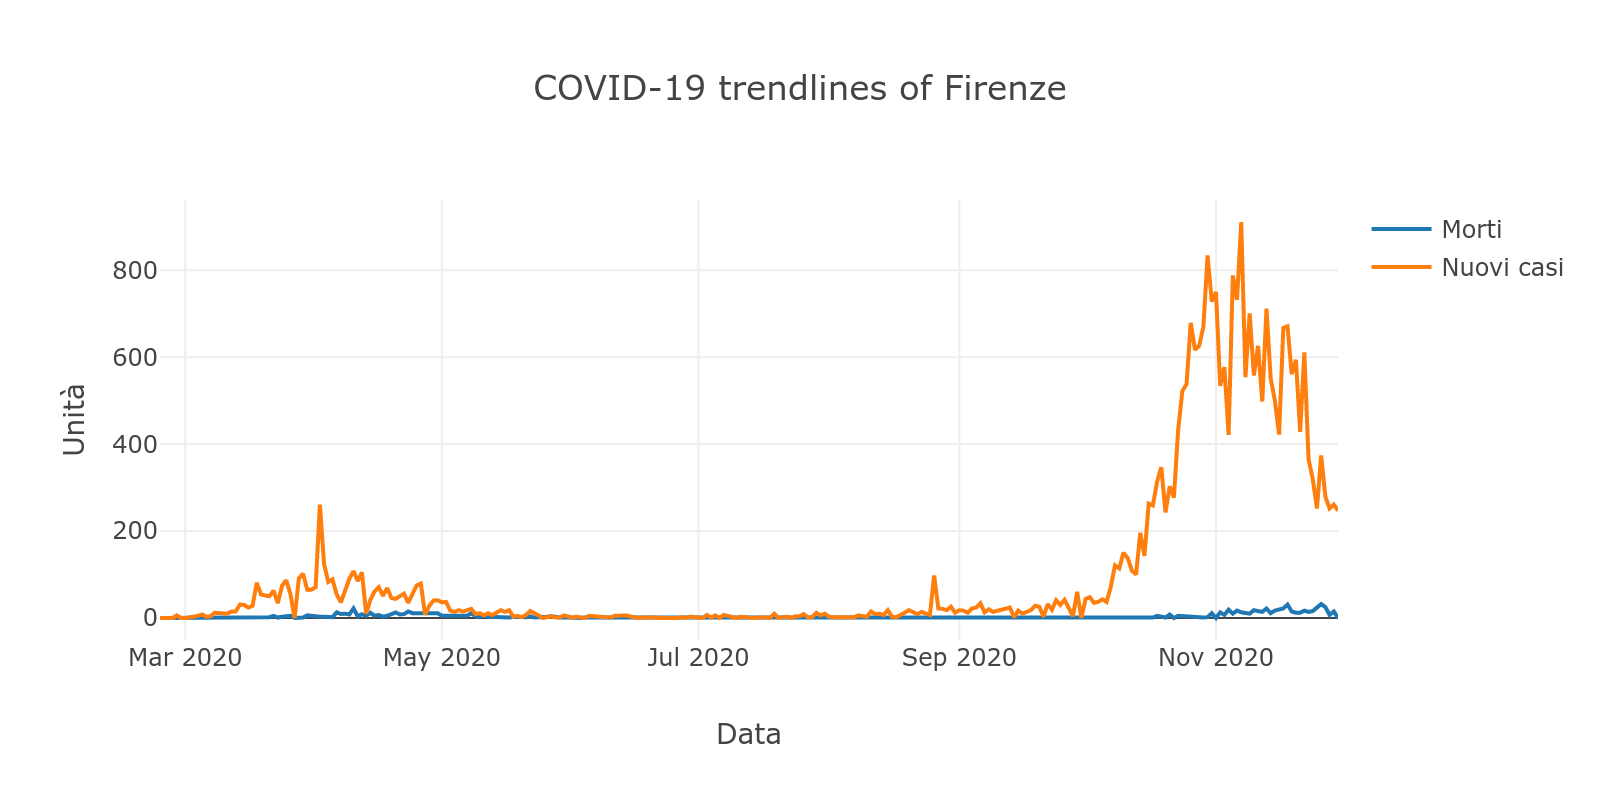

In [27]:
inter_dropdown_plot(options=covidpro_df['Province'].unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['Deaths', 'New_cases'],
                    legend_titles=['Morti', 'Nuovi casi'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True,
                    blend_legend=False)

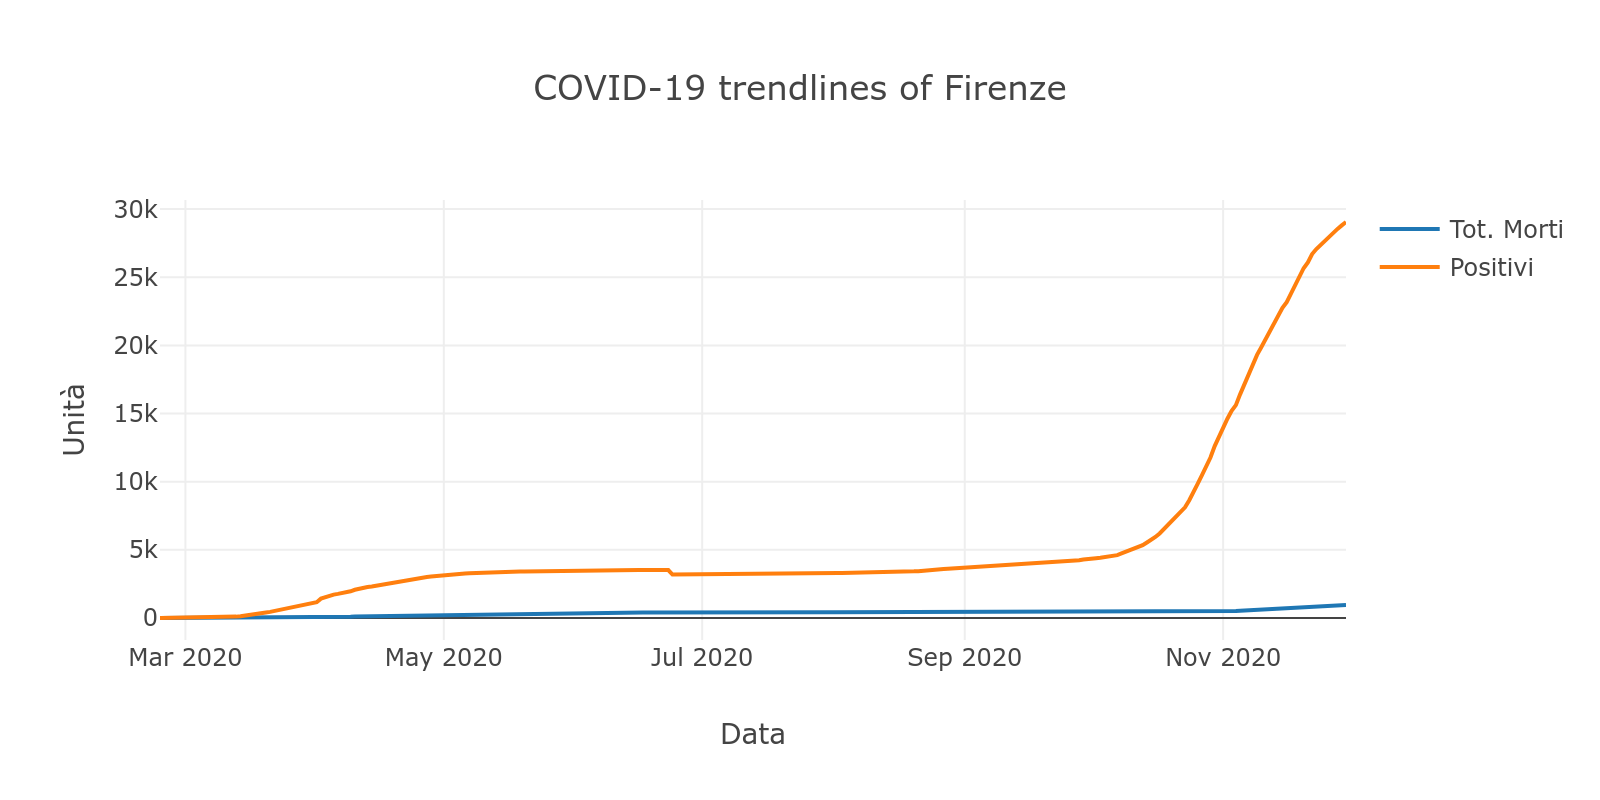

In [28]:
inter_dropdown_plot(options=covidpro_df.Province.unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['Tot_deaths', 'Curr_pos_cases'],
                    legend_titles=['Tot. Morti', 'Positivi'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True,
                    blend_legend=False)

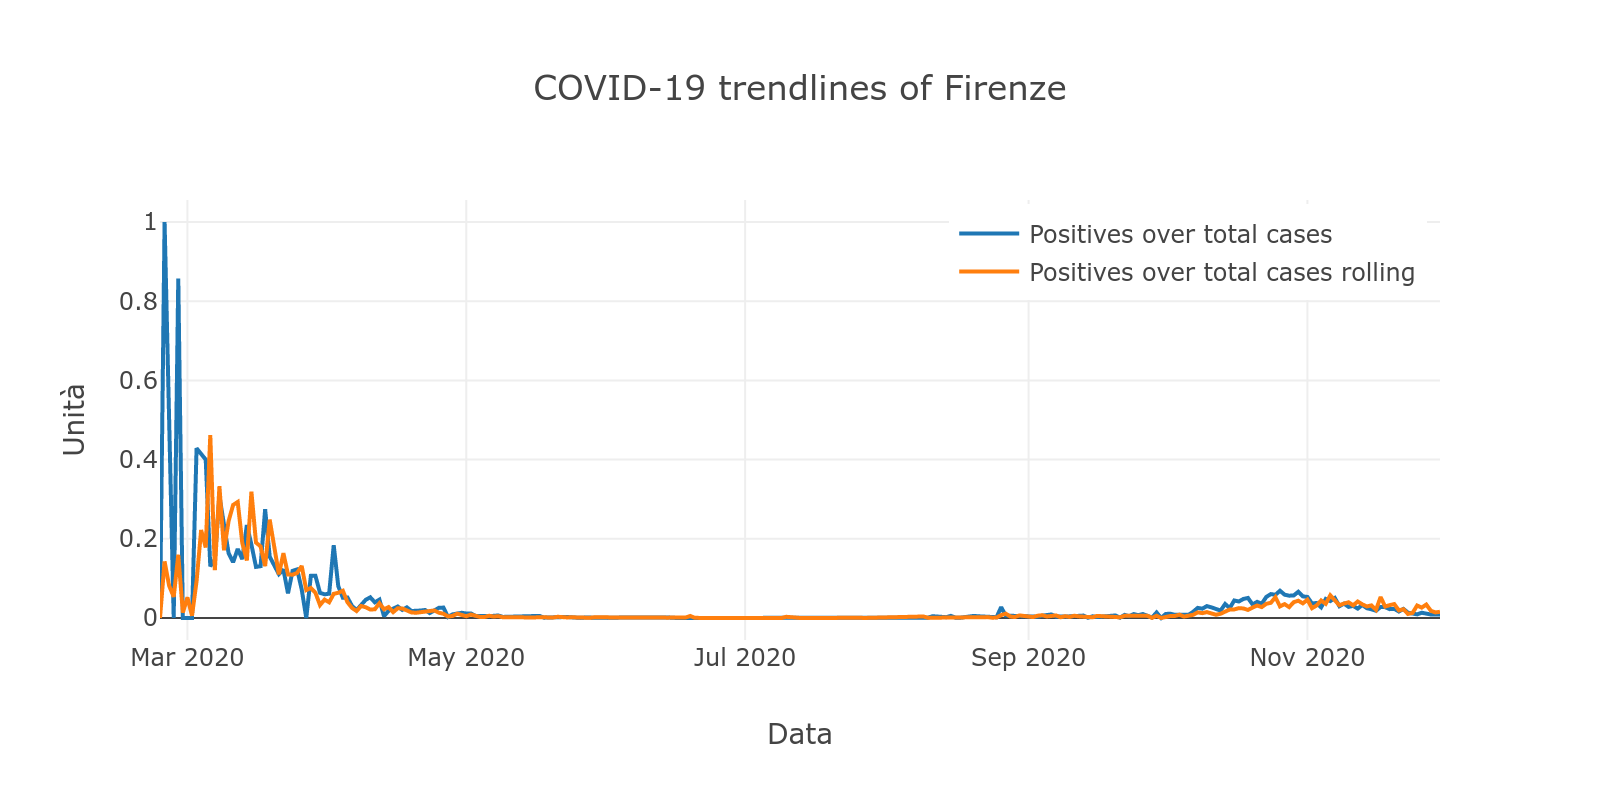

In [29]:
inter_dropdown_plot(options=covidpro_df['Province'].unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['NP_R', 'NP_R_Rolling'],
                    legend_titles=['Positives over total cases', 'Positives over total cases rolling'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True,
                    blend_legend=True)

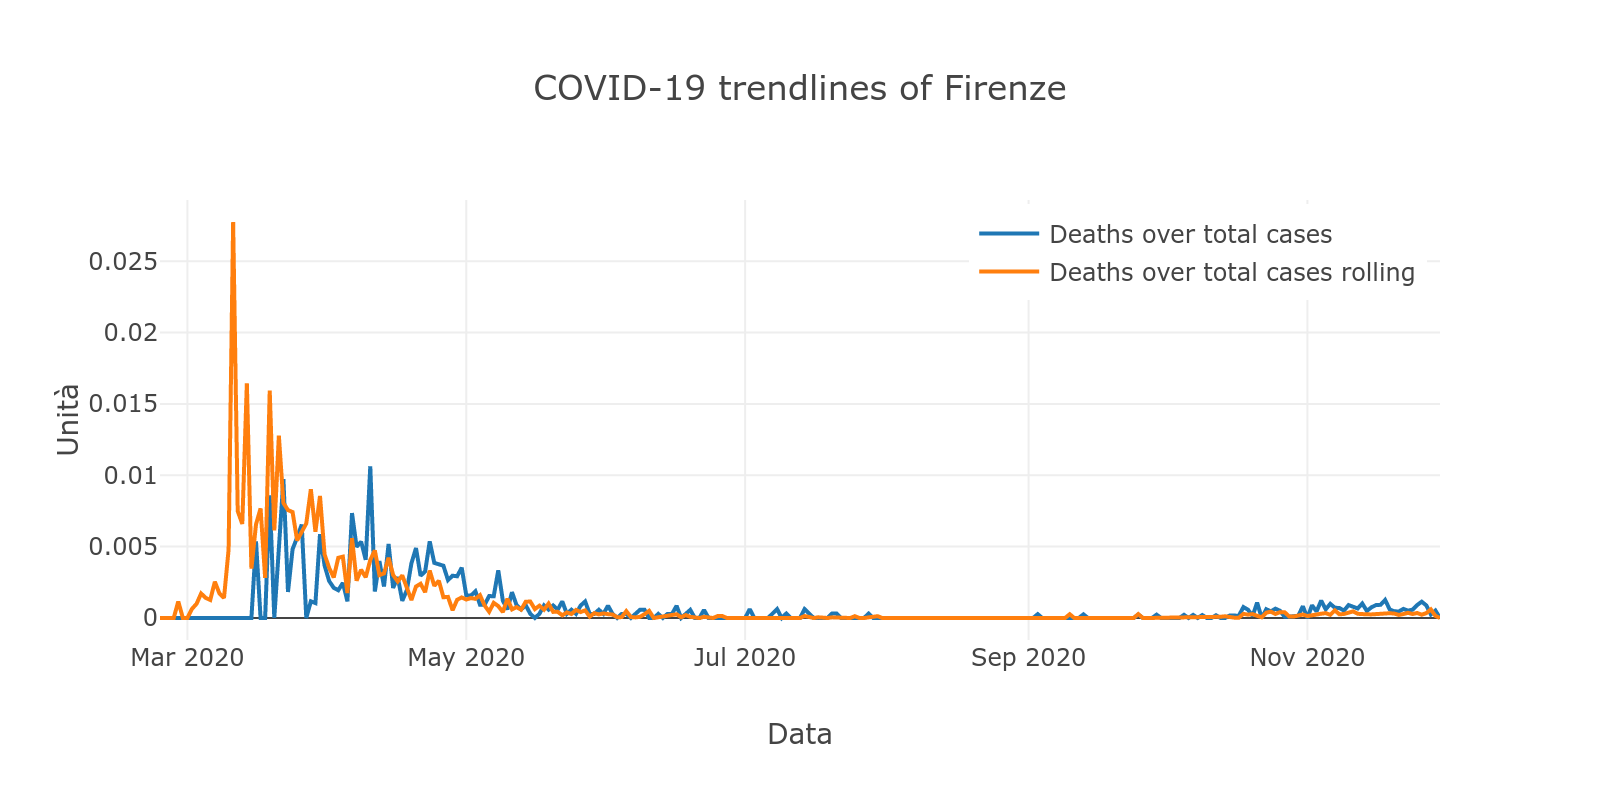

In [30]:
inter_dropdown_plot(options=covidpro_df['Province'].unique(), 
                    default_value='Firenze', 
                    dropdown_label='Provincia',
                    y=['DR', 'DR_Rolling'],
                    legend_titles=['Deaths over total cases', 'Deaths over total cases rolling'],
                    data=covidpro_df,
                    group_column='Province',
                    x='Date',
                    title='COVID-19 trendlines of ',
                    xtitle='Data',
                    ytitle='Unità',
                    output_image=True,
                    blend_legend=True)